In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
cereal_df = pd.read_csv("./data-set/cereal.csv")
cereal_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


# Data description

## Columns
- Name: Name of cereal
- mfr: Manufacturer of cereal
    - A = American Home Food Products;
    - G = General Mills
    - K = Kelloggs
    - N = Nabisco
    - P = Post
    - Q = Quaker Oats
    - R = Ralston Purina
- type:
    - cold
    - hot
- calories: calories per serving
- protein: grams of protein
- fat: grams of fat
- sodium: milligrams of sodium
- fiber: grams of dietary fiber
- carbo: grams of complex carbohydrates
- sugars: grams of sugars
- potass: milligrams of potassium
- vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
- shelf: display shelf (1, 2, or 3, counting from the floor)
- weight: weight in ounces of one serving
- cups: number of cups in one serving
- rating: a rating of the cereals (Possibly from Consumer Reports?)

1 ounce = 28.3495 grams


In [3]:
# Peek the top 5 rows of the dataframe
cereal_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [4]:
# Check whether all the data in column 'name' are unique
# create a empty list to hold the data
name = []
count = 0
for i in range(len(cereal_df)):

    # use .loc method to get the list of data in 'name' columns
    # if the current name not in the name[] array list, then count+=1
    if not cereal_df.loc[:, 'name'][i] in name:
        name.append(cereal_df.loc[:, 'name'][i])
        count += 1
count

77

All name are unique.

# Analyze data

## Analyze sugar data

Our target
Sugar: 6 grams or less per dry ounce

In [5]:
# Initialize list for holding the data 
sugars_per_ounce = []

for i in range(len(cereal_df)):

    # we need the sugars to be grams per ounce
    # but current weight is ounces per one serving
    # sugars data divide weight data will get what we want
    num = cereal_df.loc[:, 'sugars'][i] / cereal_df.loc[:, 'weight'][i]

    # convert to float
    # and append to the list we initialized
    num = float("%.1f" % num)
    sugars_per_ounce.append(num)
    
# Insert columns 'sugars_per_ounce' into the end of original dataframe
cereal_df.insert(len(cereal_df.columns), "sugars_per_ounce", sugars_per_ounce, True)

cereal_df.head()


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,sugars_per_ounce
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,6.0
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,8.0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,5.0
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,0.0
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,8.0



<ol>
    <li>Convert columns of sugars_per_ounce to float</li>
    <li>Group sugars_per_ounce by manufacturer</li>
</ol>

In [6]:
# group the data base on mfr(manufacturers)
# the sugars_per_ounce in same manufacturers group will be calculated by np.mean
cereal_df.groupby(['mfr']).agg({'sugars_per_ounce': np.mean})['sugars_per_ounce']


mfr
A    3.000000
G    7.559091
K    6.952174
N    1.833333
P    8.166667
Q    5.250000
R    6.125000
Name: sugars_per_ounce, dtype: float64

<AxesSubplot:xlabel='Manufacturer'>

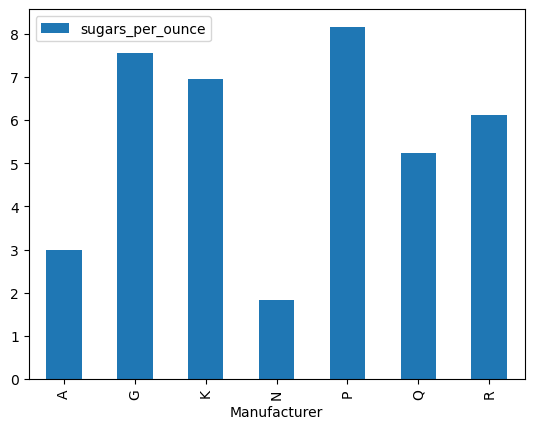

In [7]:
df = cereal_df.groupby(by = ['mfr']).agg({'sugars_per_ounce': np.mean})

# plot the data frame using bar chart
df.plot(kind='bar', xlabel='Manufacturer')



## Analyze fiber data

Want to find the cereal contains more fiber.

In [8]:
cereal_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,sugars_per_ounce
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,6.0
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,8.0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,5.0
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,0.0
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,8.0


In [9]:
# check if the data in columns 'fiber' is float type
type(cereal_df.loc[:, 'fiber'][0])

numpy.float64

In [10]:
cereal_df.groupby(by = ['mfr']).agg({'fiber': np.mean})

,fiber
mfr,
A,0.000000
G,1.272727
K,2.739130
N,4.000000
P,2.777778
Q,1.337500
R,1.875000


<AxesSubplot:xlabel='Manufacturer'>

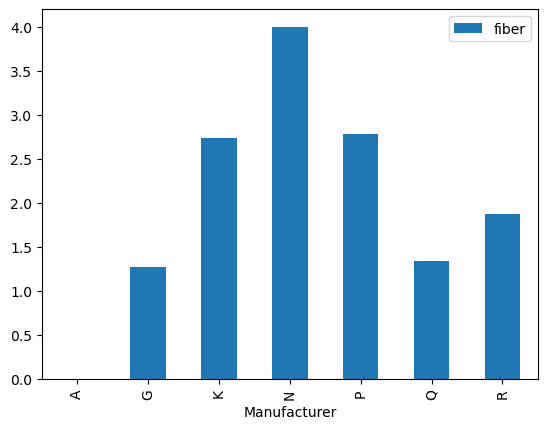

In [11]:
# group the dataframe based on the mfr(manufacturer) 
# 
df = cereal_df.groupby(by = ['mfr']).agg({'fiber': np.mean})

# plot the data using bar chart
df.plot(kind='bar', xlabel='Manufacturer')


## Analyze calories data

In [12]:
cereal_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,sugars_per_ounce
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,6.0
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,8.0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,5.0
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,0.0
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,8.0


In [13]:
flag = 1
for i in range(len(cereal_df)):
    if not isinstance(cereal_df.loc[:, "calories"][i], np.int64):
        flag = 0
        print(type(cereal_df.loc[:, "calories"][i]))
        break

if flag:
    print("All calories data are numpy.int64.")
        

All calories data are numpy.int64.


In [14]:
df = cereal_df.groupby(by = ["mfr"]).agg({"calories" : np.mean})
df

,calories
mfr,
A,100.000000
G,111.363636
K,108.695652
N,86.666667
P,108.888889
Q,95.000000
R,115.000000


<AxesSubplot:xlabel='Manufacturer'>

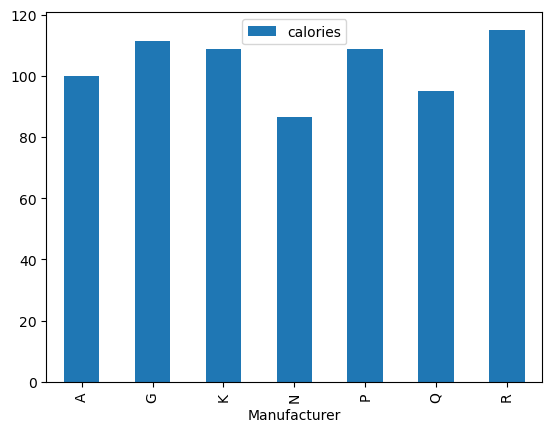

In [15]:
df = cereal_df.groupby(by = ["mfr"]).agg({"calories" : np.mean})
df.plot(kind="bar", xlabel="Manufacturer")

There's the least amount of calories in the cereals of manufacturer N.

# Conclusion

Base on the sugar, fiber and calories analysis, we should choose the cereals of manufacturer N.